In [21]:
import pandas as pd
import os

cases = pd.read_csv('covid-19-case-numbers/epidemic-curve.csv', sep=',')
absolute_path = os.path.abspath('covid-19-case-numbers/epidemic-curve.csv')
print("Successfully loaded dataset " + str(absolute_path))
print()
print("This is the shape of the dataset")
print(cases.shape)
print()
print("This is the index of the dataset")
print(cases.index)
print()
print("These are the columns in the dataset")
print(cases.columns)
print()
print("The total number of non_NA values in this dataset is:")
print(cases.count())
print()
print("A summary of this dataset is shown below:")
print(cases.info())
print()
print("A descriptive statistical summary of this dataset is shown below:")
print(cases['value'].describe())

Successfully loaded dataset C:\Users\nattan\Desktop\WPy64-39100\notebooks\covid-19-case-numbers\epidemic-curve.csv

This is the shape of the dataset
(1852, 3)

This is the index of the dataset
RangeIndex(start=0, stop=1852, step=1)

These are the columns in the dataset
Index(['date', 'type', 'value'], dtype='object')

The total number of non_NA values in this dataset is:
date     1852
type     1852
value    1852
dtype: int64

A summary of this dataset is shown below:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852 entries, 0 to 1851
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1852 non-null   object
 1   type    1852 non-null   object
 2   value   1852 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 43.5+ KB
None

A descriptive statistical summary of this dataset is shown below:
count     1852.000000
mean       944.462203
std       2740.005980
min          0.000000
25%          3.000000
50%      

In [6]:
import numpy as np
import pandas as pd
import datetime
import pandas_bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label,HoverTool, ColumnDataSource

#read the file 
df = pd.read_csv('covid-19-case-numbers/epidemic-curve.csv', sep=',')
#Converting the string object to date in DataFrame
df['date'] = pd.to_datetime(df['date'])
#Remove the date duplication and set y values
xt = df.date[df.date.duplicated(keep = 'last')]
y_imported = df[df['type']=='Imported']['value']
y_local = df[df['type']=='Local']['value']
source_Imported = ColumnDataSource(data={'x': xt, 'y': y_imported})
source_Local = ColumnDataSource(data={'x': xt, 'y': y_local})
# file to save the model
output_file("covidcases.html")
#Plotting two lines (Imported and Local)
p= figure(title="Covid-19 case in Singapore", x_axis_type= "datetime", y_range=(0,30000),
          plot_width=700, plot_height=700)
p.line(x='x', y='y', source=source_Imported,legend_label="Imported",line_color='navy',line_width=1.5)
p.line(x='x', y='y', source=source_Local,legend_label="Local",line_color='green',line_width=1.5)

#Plotting max point as cirles
xmax_imported = datetime.datetime(2022, 7, 13)
ymax_imported =max(df[df['type']=='Imported']['value'])
xmax_local = datetime.datetime(2022, 2, 22)
ymax_local =max(df[df['type']=='Local']['value'])
p.circle(x= xmax_imported, y= ymax_imported,size=7, 
         fill_color='yellow',line_color='salmon')
p.circle(x= xmax_local, y= ymax_local,size=7
         ,fill_color='yellow',line_color='salmon')

#Label of 2022-07-13 as Imported Outbreak label
label1 = Label(x= xmax_imported, y= ymax_imported,text_font_size='10pt',
              x_offset=5, y_offset=20, text="Imported Outbreak",text_baseline="top", render_mode='canvas')
#Label of 2022-02-22 Local Outbreak label
label2 = Label(x= xmax_local, y= ymax_local,text_font_size='10pt',
              x_offset=5, y_offset=20, text="Local Outbreak",text_baseline="top", render_mode='canvas')
p.add_layout(label1)
p.add_layout(label2)

# Enable hiding of the glyphs
p.legend.click_policy = "hide"
#Show information when hover over to the graph
hover_tool = HoverTool(tooltips=[('Date', '@x{%d/%m/%Y}'), ('Value', '@y')],
                       formatters={'@x': 'datetime'},) 
p.add_tools(hover_tool)
# Set some properties to make the plot look better
p.xaxis.axis_label="Date"
p.yaxis.axis_label="Covid-19 Case Stats"
p.legend.location ="top_left"
p.legend.label_text_font_size = "10pt"
show(p)


In [8]:
import random
import pandas as pd
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, FactorRange, Panel, Tabs,HoverTool
from bokeh.transform import factor_cmap
from bokeh.palettes import Turbo256, Viridis256

#read the file 
df = pd.read_csv('covid-19-case-numbers/daily-adult-icu-bed-utilisation.csv', sep=',')
# file to save the model
output_file("ICUbed.html")
#Standardized date for first graph
df.iloc[:45, 0] = '1/7/2022'
df.iloc[45:93, 0] = '16/7/2022'
df.iloc[93:, 0] = '1/8/2022'
#calculate the sum for each status with different period
sum_NonCOVID1 = sum(df[df['status']=="Non-COVID"][df['as_of_date']== "1/7/2022"]['value'])
sum_NonCOVID2 = sum(df[df['status']=="Non-COVID"][df['as_of_date']== "16/7/2022"]['value'])
sum_NonCOVID3 = sum(df[df['status']=="Non-COVID"][df['as_of_date']== "1/8/2022"]['value'])
sum_COVID1 = sum(df[df['status']=="COVID"][df['as_of_date']== "1/7/2022"]['value'])
sum_COVID2 = sum(df[df['status']=="COVID"][df['as_of_date']== "16/7/2022"]['value'])
sum_COVID3 = sum(df[df['status']=="COVID"][df['as_of_date']== "1/8/2022"]['value'])
sum_Empty1 = sum(df[df['status']=="Empty"][df['as_of_date']== "1/7/2022"]['value'])
sum_Empty2 = sum(df[df['status']=="Empty"][df['as_of_date']== "16/7/2022"]['value'])
sum_Empty3 = sum(df[df['status']=="Empty"][df['as_of_date']== "1/8/2022"]['value'])
#Creating a dictionary of our data for first graph
dates =['1/7/2022','16/7/2022','1/8/2022']
Status = ['Non-COVID', 'COVID','Empty']
mdata = {'status' : Status,
        '1/7/2022' : [sum_NonCOVID1,sum_COVID1,sum_Empty1],
        '16/7/2022' : [sum_NonCOVID2,sum_COVID2,sum_Empty2],
        '1/8/2022' : [sum_NonCOVID3,sum_COVID3,sum_Empty3]}
# Creating tuples for individual bars 
x = [(status,as_of_date) for status in Status for as_of_date in dates ]
counts = sum(zip(mdata['1/7/2022'], mdata['16/7/2022'], mdata['1/8/2022']), ())
source = ColumnDataSource(data=dict(x=x, counts=counts,color=random.sample(Turbo256,9)))
#Initializing our plot with synchronized fill colors with random colour
p = figure(x_range=FactorRange(*x),plot_width=700, plot_height=700,title="Covid-19 ICU bed utilisation from 1 Jul to 5 Aug")
p.vbar(x='x', top='counts', width=0.9,source=source,fill_color='color')
# Set some properties to make the plot look better
p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label="Date"
p.yaxis.axis_label="ICU bed utilisation stats"
p.xgrid.grid_line_color='gray'
p.xgrid.grid_line_alpha=.75
p.xgrid.grid_line_dash = 'dashed'
p.ygrid.grid_line_color='blue'
p.ygrid.grid_line_alpha =.55
p.ygrid.grid_line_dash = 'dotted'
#Show information when hover over to the graph
hoverp = HoverTool()
hoverp.tooltips = """
<div>
<div><strong>Status & Date: </strong>@x</div>
<div><strong>Count: </strong>@counts</div>
</div>"""
p.add_tools(hoverp)


#read the file 
df1 = pd.read_csv('covid-19-hospital-admissions/new-covid-19-icu-admissions.csv', sep=',')
# file to save the model
output_file("newcovidICUadmissions.html")
#Standardized date for second graph
df1.iloc[:15, 0] = '1/6/2022'
df1.iloc[15:30, 0] = '16/6/2022'
df1.iloc[30:45, 0] = '1/7/2022'
df1.iloc[45:, 0] = '16/7/2022'
#calculate the sum for each period 
first = sum(df1[df1['date']== "1/6/2022"]['new_icu_admissions'])
second = sum(df1[df1['date']== "16/6/2022"]['new_icu_admissions'])
third = sum(df1[df1['date']== "1/7/2022"]['new_icu_admissions'])
fourth = sum(df1[df1['date']== "16/7/2022"]['new_icu_admissions'])
# Creating a list of values based on the total of new covid 19 ICU admissions
x1 = ['1/6/2022','16/6/2022','1/7/2022','16/7/2022']
total = [first,second,third,fourth]
# Set the x_range to the list of values above
p1 = figure(x_range=x1,plot_width=700, plot_height=700, title="New Covid-19 ICU admissions")
p1.vbar(x=x1, top=total, width=0.9,fill_color=random.sample(Viridis256,4))
# Set some properties to make the plot look better
p1.xaxis.axis_label="Date"
p1.yaxis.axis_label="ICU admissions stats"
p1.xgrid.grid_line_color='gray'
p1.xgrid.grid_line_alpha=.75
p1.xgrid.grid_line_dash = 'dashed'
p1.ygrid.grid_line_color='blue'
p1.ygrid.grid_line_alpha =.55
p1.ygrid.grid_line_dash = 'dotted'
#Show information when hover over to the graph
hover = HoverTool()
hover.tooltips = """
<div>
<div><strong>Date: </strong>@x</div>
<div><strong>Total: </strong>@top</div>
</div>"""
p1.add_tools(hover)

#Separate two graphs into different tab
tab1 = Panel(child=p, title="Covid-19 ICU bed utilisation")
tab2 = Panel(child=p1, title="New Covid-19 ICU admissions")
all_tabs = Tabs(tabs=[tab1, tab2])

show(all_tabs)

C:\Users\nattan\AppData\Local\Temp/ipykernel_9648/621655903.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sum_NonCOVID1 = sum(df[df['status']=="Non-COVID"][df['as_of_date']== "1/7/2022"]['value'])
C:\Users\nattan\AppData\Local\Temp/ipykernel_9648/621655903.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sum_NonCOVID2 = sum(df[df['status']=="Non-COVID"][df['as_of_date']== "16/7/2022"]['value'])
C:\Users\nattan\AppData\Local\Temp/ipykernel_9648/621655903.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sum_NonCOVID3 = sum(df[df['status']=="Non-COVID"][df['as_of_date']== "1/8/2022"]['value'])
C:\Users\nattan\AppData\Local\Temp/ipykernel_9648/621655903.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sum_COVID1 = sum(df[df['status']=="COVID"][df['as_of_date']== "1/7/2022"]['value'])
C:\Users\nattan\AppData\Local\Temp/ipykernel_9648/621655903.py

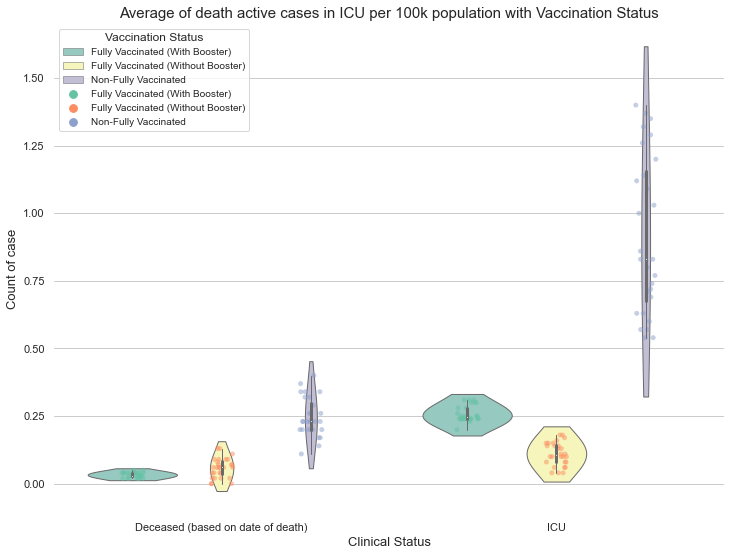

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('covid-19-case-numbers/moving-ave-of-deaths-active-cases-in-icu-per-100k-population-by-vax-status-detailed.csv', sep=',')

#set theme for styling
sns.set_theme(style= "whitegrid")
#set up the figure
plt.figure(figsize=(12,9))
#draw a violinplot with a narrower bandwidth than the default 
boxplot = sns.violinplot(x=df['clinicalstatus'], y=df["count_of_case"], hue="vaccination_status",
                    data=df, palette ="Set3",bw=1.5, cut=.5, linewidth=1)
boxplot = sns.stripplot(x=df['clinicalstatus'], y=df["count_of_case"], hue="vaccination_status",
                    data=df, palette ="Set2", dodge=True, alpha=0.5, jitter=True, zorder=1)
#set title
boxplot.axes.set_title("Average of death active cases in ICU per 100k population with Vaccination Status", fontsize=15)
#set x and y axis label 
boxplot.set_xlabel("Clinical Status", fontsize =13)
boxplot.set_ylabel("Count of case", fontsize =13)
#place legend in center right of plot
boxplot.legend(loc='upper left',fontsize =10, title='Vaccination Status')
sns.despine(left=True, bottom=True)

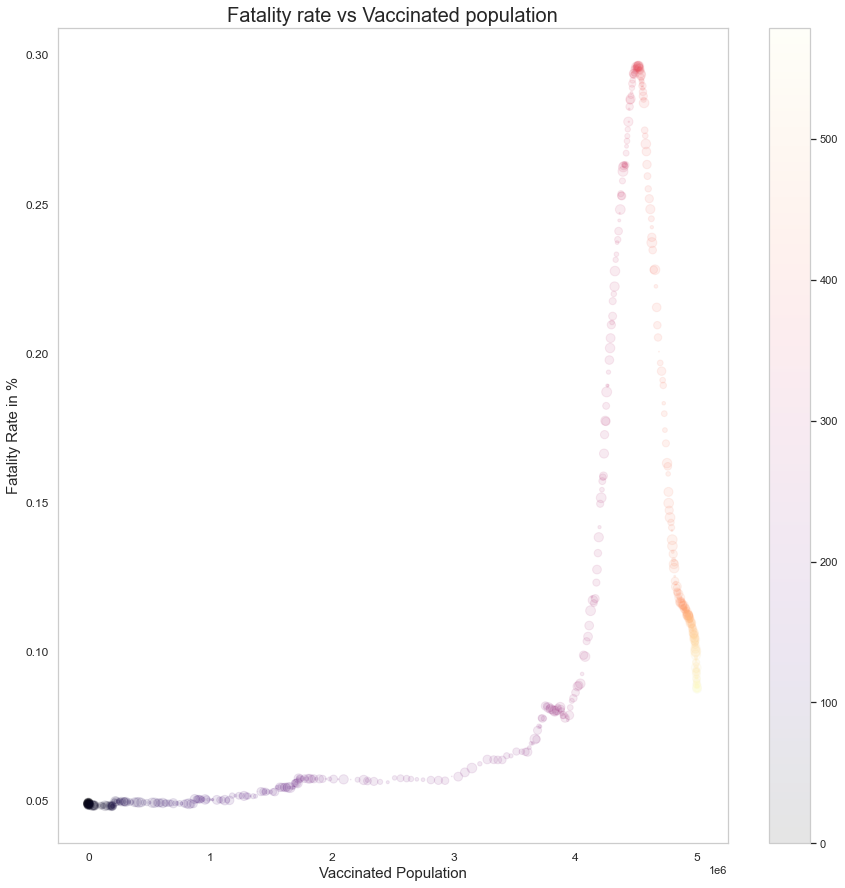

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#title of the graph
title = "Fatality rate vs Vaccinated population"
print()

#read the csv file
d = pd.read_csv('covid-19-vaccination/primary-series-vaccination-take-up-by-population.csv', sep=',')
df = pd.read_csv('covid-19-deaths/owid-covid-data.csv', sep=',')
#rename the column name 
dp= d.rename(columns={"vacc_date": "date", "received_at_least_one_dose": "one_dose",
                  "received_at_least_two_doses": "two_doses", "received_one_dose_pcttakeup":"one_dose_percentage",
                  "received_two_doses_pcttakeup":"two_doses_percentage"})
#only focus on singapore
sin = df[df['location']== "Singapore"]
#mactches date from two different files
clean_sin = sin[(sin['date']>='2020-12-30') & (sin['date']<='2022-08-01')]
#merge two dataset
data = pd.merge(dp, clean_sin, how='left', on='date')

#calculate the fatality rate (number of deaths divided by the number of comfirmed cases)
fatalityrate = (data['total_deaths'] / data['total_cases'])*100 

#set x values
x = data["two_doses"]
#generate the range for the colourbar
colors=np.arange(0,len(x),1)
sizes = (100 * np.random.rand(len(x)))

#plot the graph
plt.figure(figsize=(15,15))
plt.title(title,fontsize=20)
plt.xlabel('Vaccinated Population',fontsize=15)
plt.ylabel('Fatality Rate in %',fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid(False)
plt.scatter(x, fatalityrate, c= colors, s=sizes, alpha=0.1, cmap='magma')
# show color scale
plt.colorbar();

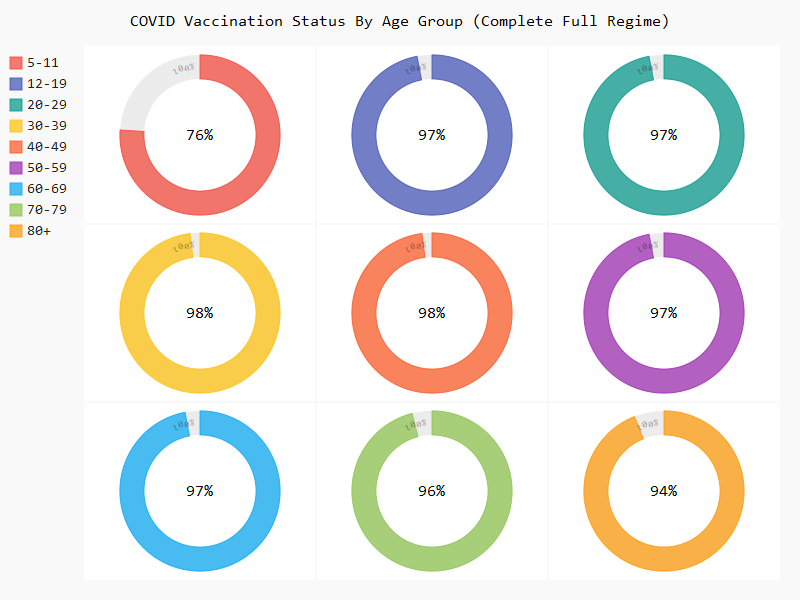

In [3]:
import pandas as pd
import pygal

#read the file
df = pd.read_csv('covid-19-vaccination/vaccination-status-by-age-group.csv', sep=',')

# creating the chart object
gauge = pygal.SolidGauge(inner_radius=0.70)
# naming the title
gauge.title = 'COVID Vaccination Status By Age Group (Complete Full Regime)'
# coverting it into percent
percent_formatter = lambda x: '{:.10g}%'.format(x)
gauge.value_formatter = percent_formatter
# vaccination percent according to different age group
percent = df['completed_full_regimen']
gauge.add('5-11', [{'value':percent[0], 'max_value': 100}])
gauge.add('12-19', [{'value':percent[1], 'max_value': 100}])
gauge.add('20-29', [{'value':percent[2], 'max_value': 100}])
gauge.add('30-39', [{'value':percent[3], 'max_value': 100}])
gauge.add('40-49', [{'value':percent[4], 'max_value': 100}])
gauge.add('50-59', [{'value':percent[5], 'max_value': 100}])
gauge.add('60-69', [{'value':percent[6], 'max_value': 100}])
gauge.add('70-79', [{'value':percent[7], 'max_value': 100}])
gauge.add('80+', [{'value':percent[8], 'max_value': 100}])
gauge


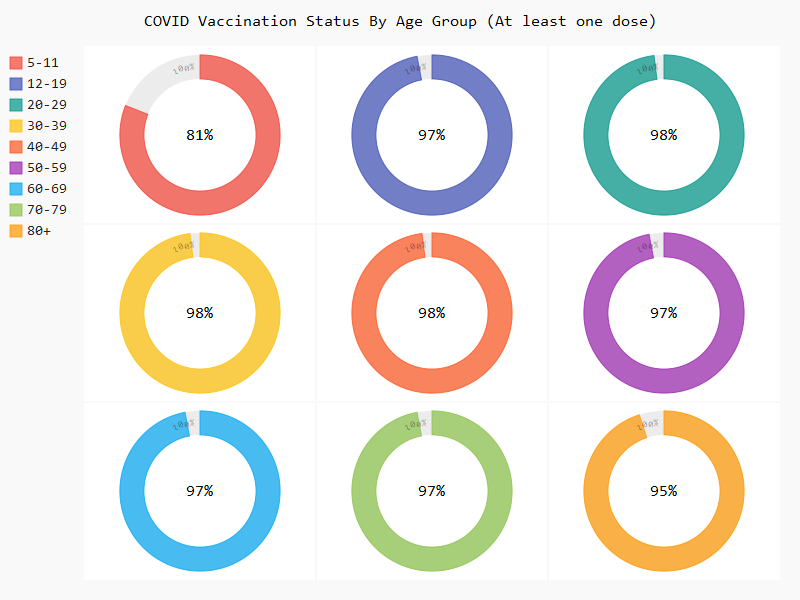

In [4]:
import pandas as pd
import pygal

#read the file
df = pd.read_csv('covid-19-vaccination/vaccination-status-by-age-group.csv', sep=',')
# creating the chart object
gauge1 = pygal.SolidGauge(inner_radius=0.70)
# naming the title
gauge1.title = 'COVID Vaccination Status By Age Group (At least one dose)'
# coverting it into percent
percent_formatter = lambda x: '{:.10g}%'.format(x)
gauge1.value_formatter = percent_formatter
# vaccination percent according to different age group
onedose = df['at_least_one_dose']
gauge1.add('5-11', [{'value':onedose[0], 'max_value': 100}])
gauge1.add('12-19', [{'value':onedose[1], 'max_value': 100}])
gauge1.add('20-29', [{'value':onedose[2], 'max_value': 100}])
gauge1.add('30-39', [{'value':onedose[3], 'max_value': 100}])
gauge1.add('40-49', [{'value':onedose[4], 'max_value': 100}])
gauge1.add('50-59', [{'value':onedose[5], 'max_value': 100}])
gauge1.add('60-69', [{'value':onedose[6], 'max_value': 100}])
gauge1.add('70-79', [{'value':onedose[7], 'max_value': 100}])
gauge1.add('80+', [{'value':onedose[8], 'max_value': 100}])
gauge1

In [9]:
import pandas as pd
import mysql.connector
from mysql.connector import errorcode
from dateutil.parser import parse
from datetime import date, datetime, timedelta

df = pd.read_csv("covid-19-case-numbers/number-of-local-cases-by-age.csv")
user,pw, host,db = 'root', 'it8701','127.0.0.1','mydatabase'

cnx = mysql.connector.connect(user=user, password=pw, host=host, database=db)
cursor = cnx.cursor()
sql = "DROP TABLE IF EXISTS local_cases_by_age"
result = cursor.execute(sql)

#creating a table
query_for_creating_table = ("CREATE TABLE `local_cases_by_age` ("
    "`each_day_id` int(11) NOT NULL AUTO_INCREMENT,"
    "`pr_date` date NOT NULL,"
    "`age_group` varchar(50) NOT NULL,"
    "`count_of_case` int(11) NOT NULL,"
    "PRIMARY KEY (`each_day_id`)"
    ") ENGINE=InnoDB")
result = cursor.execute(query_for_creating_table)
print("Table created!")
try: 
    for index, col in df.iterrows():
        date = parse(col[0]).strftime("%d/%m/%Y")
        dt_obj_date = datetime.strptime(date, "%d/%m/%Y")
        data = {
            'pr_date': dt_obj_date,
            'age_group': col[1],
            'count_of_case': col[2]
        }
        query = insert_stmt = ("INSERT INTO local_cases_by_age (pr_date, age_group, count_of_case)"
                            "VALUES (%(pr_date)s, %(age_group)s, %(count_of_case)s)")
        
        result = cursor.execute(query, data)
        cnx.commit()
    #inserting a new row of data
    insert_stmt1 = ("INSERT INTO local_cases_by_age (pr_date, age_group, count_of_case)"
               "VALUES (%(pr_date)s, %(age_group)s, %(count_of_case)s)")
    data1 = {
        'pr_date': datetime(2022, 8, 5).date(),
        'age_group': '0 - 11 years old',
        'count_of_case': 700
    }
    cursor.execute(insert_stmt1, data1)
    cnx.commit()
    print("Insert done!")
    
    #retrieving the data that have just inserted 
    select_stmt2 = ("SELECT * FROM local_cases_by_age WHERE pr_date = %(pr_date)s")
    data2 = { 'pr_date': (datetime(2022, 8, 5).date())}
    cursor.execute(select_stmt2, data2)
    df = pd.DataFrame(cursor.fetchall(), columns = ['each_day_id','pr_date', 'age_group','count_of_case'])
    print("Retrieving data...")
    print(df)
    print("Query finished!")
    print()
    
    # execute your query to view the whole table
    print("The whole dataset")
    cursor.execute("SELECT * FROM local_cases_by_age")
    # fetch all the matching rows 
    result = cursor.fetchall()
    # loop through the rows
    for row in result:
        print(row)

except:
    print("Unexpected error:", sys.exc_info()[0])
    exit()

finally:
    cursor.close()
    cnx.close()

Table created!
Insert done!
Retrieving data...
   each_day_id     pr_date         age_group  count_of_case
0          169  2022-08-05  0 - 11 years old            700
Query finished!

The whole dataset
(1, datetime.date(2022, 7, 8), '70 years old and above', 670)
(2, datetime.date(2022, 7, 9), '70 years old and above', 660)
(3, datetime.date(2022, 7, 10), '70 years old and above', 459)
(4, datetime.date(2022, 7, 11), '70 years old and above', 333)
(5, datetime.date(2022, 7, 12), '70 years old and above', 394)
(6, datetime.date(2022, 7, 13), '70 years old and above', 1029)
(7, datetime.date(2022, 7, 14), '70 years old and above', 815)
(8, datetime.date(2022, 7, 15), '70 years old and above', 695)
(9, datetime.date(2022, 7, 16), '70 years old and above', 687)
(10, datetime.date(2022, 7, 17), '70 years old and above', 612)
(11, datetime.date(2022, 7, 18), '70 years old and above', 498)
(12, datetime.date(2022, 7, 19), '70 years old and above', 865)
(13, datetime.date(2022, 7, 20), '70 yea